In [10]:
from collections import OrderedDict
from copy import deepcopy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import kabuki

import hddm
from hddm import HDDMRegressor

from scipy.stats import pearsonr

In [11]:
run_type='regress'

estimators=['HDDMRegressor']

n_subjs=12
n_trials=50

seed_data=1
seed_params=1

equal_seeds=True

factor3_vals=0.5

include=['sv']
depends_on = {}

#kwargs for initialize estimation
init = OrderedDict([('include', include), 
                    ('depends_on', depends_on)])
#kwargs for estimation
estimate = OrderedDict([('runs', 3)])

#include params
params = OrderedDict([('include', include)])
#subject noise
subj_noise = OrderedDict([('v', 0.2),
                          ('a', 0.2), 
                          ('t', 0.1),
                          ('sv',0.1),
                          ('v_inter',0.1)])
#estimator_dict
estimator_dict = OrderedDict()

#sampling params
hddm_sampling_params = OrderedDict([('samples', 1500), 
                                    ('burn', 500), 
                                    ('map', False)])
#sampling
estimator_dict['HDDMRegressor'] = OrderedDict([('estimator', EstimationHDDMRegressor), 
                                                   ('params', hddm_sampling_params)])

In [12]:
cur_trials=50
cur_subjs=10
cur_value=factor3_vals
effect = cur_value
n_conds=2
#create kw_dict
kw_dict = OrderedDict([('params', params), 
                       ('init', init), 
                       ('estimate', estimate), 
                       ('n_conds', n_conds)])
exclude = set(['sv','st','sz','z', 'reg_outcomes'])
cur_outliers = 0
n_outliers = int(cur_trials * cur_outliers)
n_fast_outliers = (n_outliers // 2)
n_slow_outliers = n_outliers - n_fast_outliers
data = OrderedDict([('subjs', cur_subjs), 
                    ('subj_noise', subj_noise), 
                    ('size', cur_trials - n_outliers),
                    ('exclude_params', exclude)])
kw_dict['data'] = data

In [13]:
kw_dict

OrderedDict([('params', OrderedDict([('include', ['sv'])])),
             ('init', OrderedDict([('include', ['sv']), ('depends_on', {})])),
             ('estimate', OrderedDict([('runs', 3)])),
             ('n_conds', 2),
             ('data',
              OrderedDict([('subjs', 10),
                           ('subj_noise',
                            OrderedDict([('v', 0.2),
                                         ('a', 0.2),
                                         ('t', 0.1),
                                         ('sv', 0.1),
                                         ('v_inter', 0.1)])),
                           ('size', 50),
                           ('exclude_params',
                            {'reg_outcomes', 'st', 'sv', 'sz', 'z'})]))])

In [14]:
data

OrderedDict([('subjs', 10),
             ('subj_noise',
              OrderedDict([('v', 0.2),
                           ('a', 0.2),
                           ('t', 0.1),
                           ('sv', 0.1),
                           ('v_inter', 0.1)])),
             ('size', 50),
             ('exclude_params', {'reg_outcomes', 'st', 'sv', 'sz', 'z'})])

In [15]:
estimator_dict

OrderedDict([('HDDMRegressor',
              OrderedDict([('estimator', __main__.EstimationHDDMRegressor),
                           ('params',
                            OrderedDict([('samples', 1500),
                                         ('burn', 500),
                                         ('map', False)]))]))])

In [16]:
model_name = 'HDDMRegressor'
descr = estimator_dict['HDDMRegressor']
#create kw_dict
kw_dict_model = deepcopy(kw_dict)
kw_dict_model['estimate'] = descr['params']
def reg_func(args, cols):
    return args[0]*cols[:,0]+args[1]
reg = {'func': reg_func, 
       'args':['v_slope','v_inter'], 
       'covariates': 'cov', 
       'outcome':'v'}
reg = OrderedDict(sorted(reg.items(), key=lambda t: t[0]))
kw_dict_model['init']['regressor'] = reg
kw_dict_model['init']['depends_on'] = {}

In [17]:
kw_dict_model

OrderedDict([('params', OrderedDict([('include', ['sv'])])),
             ('init',
              OrderedDict([('include', ['sv']),
                           ('depends_on', {}),
                           ('regressor',
                            OrderedDict([('args', ['v_slope', 'v_inter']),
                                         ('covariates', 'cov'),
                                         ('func',
                                          <function __main__.reg_func(args, cols)>),
                                         ('outcome', 'v')]))])),
             ('estimate',
              OrderedDict([('samples', 1500), ('burn', 500), ('map', False)])),
             ('n_conds', 2),
             ('data',
              OrderedDict([('subjs', 10),
                           ('subj_noise',
                            OrderedDict([('v', 0.2),
                                         ('a', 0.2),
                                         ('t', 0.1),
                                         (

In [18]:
estimation = descr['estimator']

In [19]:
params = hddm.generate.gen_rand_params(kw_dict['params']['include'][0])
params['v_slope'] = effect
params['v_inter'] = 1
params['sv'] = 0
del params['v']
kw_dict_model['estimator_class'] = estimation.__name__
params['reg_outcomes'] = 'v'

In [20]:
params

{'sv': 0,
 'sz': 0,
 'st': 0,
 'z': 0.5,
 't': 0.4056455481292945,
 'a': 1.2845511344303753,
 'v_slope': 0.5,
 'v_inter': 1,
 'reg_outcomes': 'v'}

In [21]:
kw_dict_model

OrderedDict([('params', OrderedDict([('include', ['sv'])])),
             ('init',
              OrderedDict([('include', ['sv']),
                           ('depends_on', {}),
                           ('regressor',
                            OrderedDict([('args', ['v_slope', 'v_inter']),
                                         ('covariates', 'cov'),
                                         ('func',
                                          <function __main__.reg_func(args, cols)>),
                                         ('outcome', 'v')]))])),
             ('estimate',
              OrderedDict([('samples', 1500), ('burn', 500), ('map', False)])),
             ('n_conds', 2),
             ('data',
              OrderedDict([('subjs', 10),
                           ('subj_noise',
                            OrderedDict([('v', 0.2),
                                         ('a', 0.2),
                                         ('t', 0.1),
                                         (

In [22]:
share_noise = ('a','v','t','st','sz','sv','z', 'v_slope', 'v_inter')

# set valid param ranges
bounds = {'a': (0, np.inf),
          'z': (0, 1),
          't': (0, np.inf),
          'st': (0, np.inf),
          'sv': (0, np.inf),
          'sz': (0, 1)
}
subj_params = kabuki.generate._add_noise({'none': params}, 
                           noise=OrderedDict([('v', 0.2),
                           ('a', 0.2),
                           ('t', 0.1),
                           ('sv', 0.1),
                           ('v_inter', 0.1)]), 
                           share_noise=share_noise,
                                    check_valid_func=hddm.utils.check_params_valid,
                                    bounds=bounds,
                                    exclude_params={'reg_outcomes', 'st', 'sv', 'sz', 'z'})['none']

In [23]:
subj_params

{'sv': 0,
 'sz': 0,
 'st': 0,
 'z': 0.5,
 't': 0.6314545822009845,
 'a': 1.1557478921030353,
 'v_slope': 0.5,
 'v_inter': 1.041523222493516,
 'reg_outcomes': 'v'}

In [24]:
group_params=[]
group_params.append(subj_params)
#generate v
wfpt_params = deepcopy(subj_params)
wfpt_params.pop('v_inter')
effect = wfpt_params.pop('v_slope')

In [25]:
wfpt_params

{'sv': 0,
 'sz': 0,
 'st': 0,
 'z': 0.5,
 't': 0.6314545822009845,
 'a': 1.1557478921030353,
 'reg_outcomes': 'v'}

In [26]:
effect

0.5

In [27]:
subj_params['v_inter']

1.041523222493516

In [28]:
x1 = np.random.randn(500)
x2 = np.random.randn(500)
wfpt_params['v'] = (effect*x1 + np.sqrt(1-effect**2)*x2) + subj_params['v_inter'];

In [29]:
wfpt_params['v'].mean()

1.0099135291201031

In [30]:
def gen_regression_rts(size, reg_outcomes, p_outlier=0, **params_dict):

    i_params = deepcopy(params_dict)
    sampled_rts = pd.DataFrame(np.zeros((size, 2)), columns=['rt', 'response'])
    for i_sample in range(len(sampled_rts)):
        #get current params
        for p in reg_outcomes:
            i_params[p] = params_dict[p][i_sample]
        #sample
        sampled_rts.iloc[i_sample,:] = hddm.generate.gen_rts(size=1, method='drift', dt=1e-3, **i_params).values
    return sampled_rts

In [31]:
data, group_params = kabuki.generate.gen_rand_data(gen_regression_rts, 
                              wfpt_params,
                              size=500,
                              check_valid_func=hddm.utils.check_params_valid,
                              bounds=bounds, 
                              share_noise=share_noise)

In [32]:
data['cov']=x1

In [33]:
kw_dict_model['init']

OrderedDict([('include', ['sv']),
             ('depends_on', {}),
             ('regressor',
              OrderedDict([('args', ['v_slope', 'v_inter']),
                           ('covariates', 'cov'),
                           ('func', <function __main__.reg_func(args, cols)>),
                           ('outcome', 'v')]))])

In [34]:
estimate

OrderedDict([('runs', 3)])

In [35]:
kw_dict_model['estimate']

OrderedDict([('samples', 1500), ('burn', 500), ('map', False)])

In [36]:
group_params['v'].mean()

1.0099135291201031

In [37]:
m = HDDMRegressor(data,
                 'v~cov')
m.sample(2000,burn=1000)

Adding these covariates:
['v_Intercept', 'v_cov']
 [-----------------100%-----------------] 2000 of 2000 complete in 24.0 sec

In [38]:
data

,rt,response,subj_idx,condition,cov
0,1.240729,1.0,0,none,-0.843039
1,0.742729,1.0,0,none,1.735573
2,0.720729,1.0,0,none,1.170850
3,0.958729,1.0,0,none,0.231936
4,0.698729,1.0,0,none,-0.481194
...,...,...,...,...,...
495,0.894729,1.0,0,none,0.914292
496,0.978729,0.0,0,none,-0.525856
497,0.846729,1.0,0,none,0.132006
498,0.928729,1.0,0,none,-0.469006


In [39]:
print(f'a is {group_params["a"]}\n',
      f'z is {group_params["z"]}\n',
      f't is {group_params["t"]}\n',
      f'v is {group_params["v"].mean()}\n',
      f'effect is {effect}\n')

a is 1.1557478921030353
 z is 0.5
 t is 0.6314545822009845
 v is 1.0099135291201031
 effect is 0.5



Plotting a
Plotting t
Plotting v_Intercept
Plotting v_cov


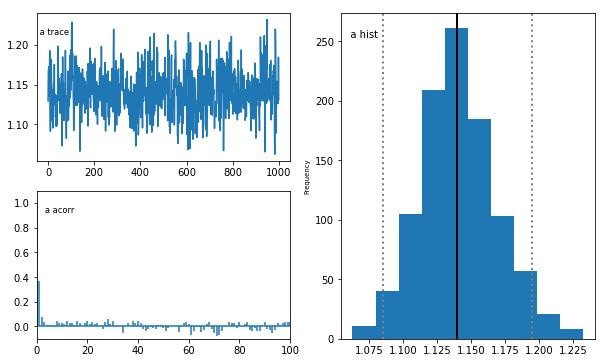

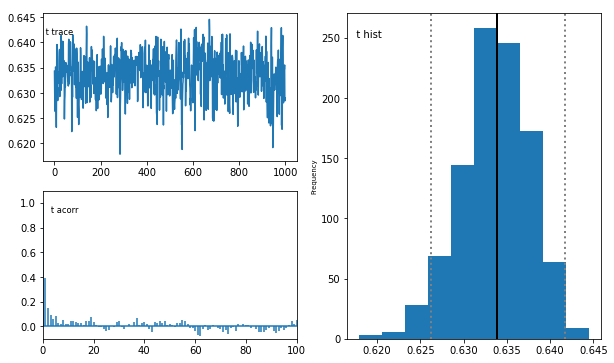

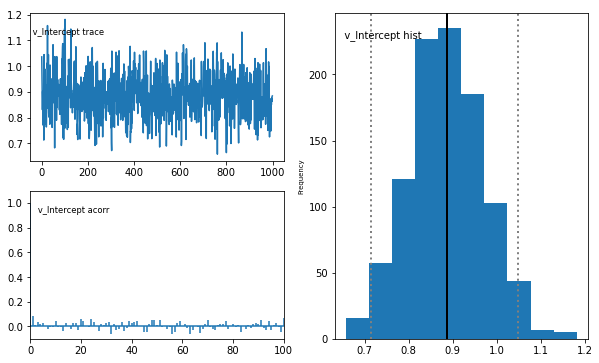

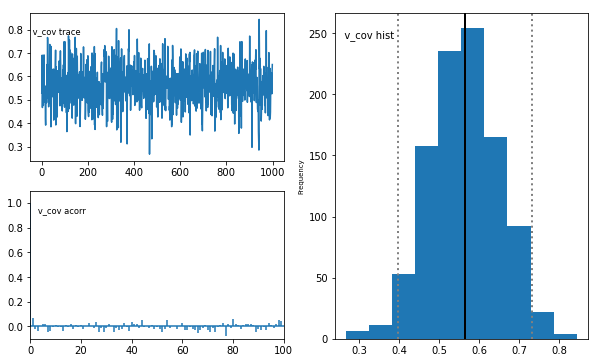

In [40]:
m.plot_posteriors()

In [43]:
wfpt_params

{'sv': 0,
 'sz': 0,
 'st': 0,
 'z': 0.5,
 't': 0.6314545822009845,
 'a': 1.1557478921030353,
 'reg_outcomes': 'v',
 'v': array([ 1.27236755e+00,  2.46092982e+00,  2.43719911e+00,  1.95775567e+00,
         1.63353153e+00, -5.10834914e-01,  1.79539596e+00,  4.36015002e-01,
         4.92571982e-01,  2.62689985e+00,  1.59051549e+00,  1.37624362e+00,
         1.25148806e+00,  9.42533154e-01,  7.54492441e-01,  2.16853847e-01,
         1.20221372e+00,  6.40636135e-01,  3.38486304e-01,  2.40547068e+00,
         1.82315084e+00,  8.14128446e-01,  2.39825764e+00,  2.22354004e+00,
         8.63819630e-01,  1.43031299e+00,  2.07933583e+00,  2.26214202e+00,
         1.90338495e-01,  4.87518776e-01, -4.67092521e-01,  2.48807878e+00,
         2.43161379e-01,  1.14038609e+00, -1.19759414e-01,  1.09224837e+00,
         2.13338033e+00,  9.22814489e-01, -3.04288125e-01,  8.44979357e-01,
         1.42073726e+00,  2.27909909e+00,  2.28174029e+00,  7.84552312e-02,
         1.83674806e+00,  5.26370991e-01,  1

In [42]:
subj_params

{'sv': 0,
 'sz': 0,
 'st': 0,
 'z': 0.5,
 't': 0.6314545822009845,
 'a': 1.1557478921030353,
 'v_slope': 0.5,
 'v_inter': 1.041523222493516,
 'reg_outcomes': 'v'}